<h2>Import the required Libraries.</h2>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

<h2>Load the dataset</h2>

In [2]:
df_email_table=pd.read_csv('./email_table.csv')
df_link_clicked_table=pd.read_csv('./link_clicked_table.csv')
df_email_opened_table=pd.read_csv('./email_opened_table.csv')

In [3]:
df_email_table.head(10)

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6
5,684440,long_email,personalized,6,Sunday,UK,3
6,139620,short_email,personalized,9,Saturday,US,8
7,694933,long_email,generic,8,Saturday,US,2
8,485760,long_email,personalized,5,Monday,US,4
9,592665,short_email,personalized,23,Wednesday,US,3


In [4]:
#Check for null values
df_email_table.isna().sum()

email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
dtype: int64

In [5]:
df_link_clicked_table.head(10)

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561
5,790513
6,164034
7,284534
8,912656
9,829393


In [6]:
df_email_opened_table.head(10)

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034
5,935124
6,473874
7,158501
8,922766
9,378153


<h2>Add binary columns opened and clicked</h2>

In [7]:
df_email_table['opened'] = df_email_table['email_id'].isin(df_email_opened_table['email_id']).astype(int)
df_email_table['clicked'] = df_email_table['email_id'].isin(df_link_clicked_table['email_id']).astype(int)
df_email_table.head(10)

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0
5,684440,long_email,personalized,6,Sunday,UK,3,0,0
6,139620,short_email,personalized,9,Saturday,US,8,1,0
7,694933,long_email,generic,8,Saturday,US,2,0,0
8,485760,long_email,personalized,5,Monday,US,4,0,0
9,592665,short_email,personalized,23,Wednesday,US,3,0,0


In [8]:
df_email_table.isna().sum()

email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
opened                 0
clicked                0
dtype: int64

<h2>Calculate Open Rate and CTR</h2>
This analysis will answer the first question of case study i.e. <b>What percentage of users opened the email and what percentage clicked on the link within the email?</b>

In [9]:
total_emails=len(df_email_table)
print(total_emails)

100000


In [10]:
open_rate=df_email_table['opened'].sum()/total_emails
click_rate=df_email_table['clicked'].sum()/total_emails
click_to_open_rate=df_email_table['clicked'].sum()/df_email_table['opened'].sum()

In [11]:
print(f"Open Rate:{open_rate:.2%}")
print(f"Click Rate:{click_rate:.2%}")
print(f"click_to_open_rate:{click_to_open_rate:.2%}")

Open Rate:10.35%
Click Rate:2.12%
click_to_open_rate:20.48%


From the analysis it is clear that percentage of users that opened the email is 10.35% and the percentage of users that clicked the link in the email are only 2.12%.Click to open ratio is 20.48% showing that the maximum number of recipients clicked the link in the email but the problem is with the open rate.The open rate should increase then the click rate will naturally increase.

<h2>Exploratory Data Analysis</h2>

In [12]:
#Now we will check whether email text type affect click rate

email_text_analysis = df_email_table.groupby('email_text')[['opened', 'clicked']].mean()*100

print(email_text_analysis)

                opened   clicked
email_text                      
long_email    9.117670  1.853767
short_email  11.585954  2.387177


From the above analysis, 11.5% users opened short email and 2.1% of them clicked the link inside email whereas long emails are less opened and clicked.

In [13]:
# Group by email_version and calculate open and click rates
email_version_analysis = df_email_table.groupby('email_version')[['opened', 'clicked']].mean()*100

print(email_version_analysis)

                  opened   clicked
email_version                     
generic         7.934832  1.513673
personalized   12.775401  2.729409


Personalized emails are opened more but still click rate of links is less.

In [14]:
country_analysis = df_email_table.groupby('user_country')[['opened', 'clicked']].mean().sort_values(by='clicked', ascending=False)*100

print(country_analysis)

                 opened   clicked
user_country                     
UK            12.016651  2.467526
US            11.902028  2.435981
ES             3.912913  0.832748
FR             4.062031  0.800400


UK and US has the maximum number of recipients opening these emails but the click rate of links are very low.

In [15]:
hour_analysis = df_email_table.groupby('hour')[['opened', 'clicked']].mean()*100

print(hour_analysis)

         opened   clicked
hour                     
1      8.842027  1.812801
2      8.786725  1.632209
3      8.459870  1.952278
4      8.822483  1.618641
5      8.212487  1.801252
6      9.028801  1.714668
7      9.007801  1.828376
8      8.847345  1.893308
9     12.568883  2.579435
10    13.239609  2.823961
11    12.655352  2.712816
12    12.446220  2.566073
13    10.912023  1.988891
14    10.938865  2.074236
15    10.535356  2.490696
16    10.474810  2.319681
17    10.935024  1.848917
18     9.429979  1.618578
19     7.513812  1.657459
20     8.841463  1.219512
21     5.753425  0.821918
22     6.372549  1.960784
23     8.275862  4.137931
24    15.942029  2.898551


In these 24 hour duration, the percentage of opening the emails were maximum between 9 hours to 17 hours duration.At the 24th hour, 15.9% of the users opened the email.In this whole duration, the clicking rate of links are still less.

In [16]:
weekday_analysis = df_email_table.groupby('weekday')[['opened', 'clicked']].mean()*100

print(weekday_analysis)

              opened   clicked
weekday                       
Friday      7.413416  1.403682
Monday     11.606210  2.290608
Saturday    8.765186  1.784611
Sunday      8.764857  1.675123
Thursday   11.844225  2.444491
Tuesday    12.048363  2.488864
Wednesday  12.027833  2.761999


Weekday analysis shows that Monday, Thursday, Tuesday and Wednesday has the maximum number of user opening these emails.

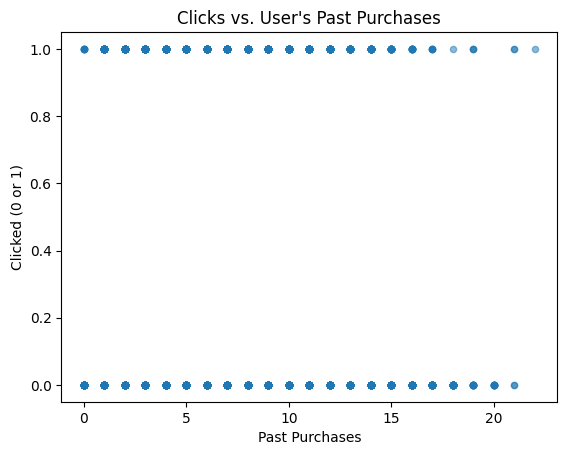

In [17]:
df_email_table.plot.scatter(x='user_past_purchases', y='clicked', alpha=0.5)
plt.title("Clicks vs. User's Past Purchases")
plt.xlabel("Past Purchases")
plt.ylabel("Clicked (0 or 1)")
plt.show()

The plot <b>"Clicks vs. User's Past Purchases"</b> suggests a relationship between a user's historical purchase behavior and their likelihood to click on the email campaign.

<h2>Model Building – Predicting Click Probability</h2>
This is clear from the previous feature analysis that the number of users clicking the link inside email were very less in number.If we could increase the number of user clicks then the number of emails opened will also automatically increase.
Let's now build the model to maximize the probability of users clicking the link inside emails.

Random Forest is an ensemble learning technique that combines the predictions of multiple decision trees to improve accuracy and control overfitting. Unlike a single decision tree, which may be prone to high variance, Random Forests reduce this risk by building multiple trees on randomly sampled data and features.

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
features = df_email_table[['email_text', 'email_version', 'hour', 'weekday', 'user_country', 'user_past_purchases']]
target = df_email_table['clicked']

In [20]:
# One-hot encode categorical features
features_encoded = pd.get_dummies(features)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.3, random_state=42)

In [22]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [23]:
# Print evaluation metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[29222   104]
 [  667     7]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29326
           1       0.06      0.01      0.02       674

    accuracy                           0.97     30000
   macro avg       0.52      0.50      0.50     30000
weighted avg       0.96      0.97      0.97     30000



Accuracy: 0.97 — Looks good, but it's misleading due to class imbalance.
Macro Avg F1-Score: 0.50 — Indicates the model is not performing well for the minority class (clicking links).
Weighted Avg F1-Score: 0.97 — Dominated by the majority class (no-clicks).

In [24]:
# Predict click probabilities
df_email_table['predicted_click_prob'] = model.predict_proba(features_encoded)[:,1]

# Sort by highest predicted click probability
top_emails = df_email_table.sort_values(by='predicted_click_prob', ascending=False)

# Simulate sending to top N% (say 30%) of users
top_30_percent = top_emails.head(int(0.3 * len(top_emails)))

# Estimated CTR for top 30%
estimated_ctr = top_30_percent['clicked'].mean()
original_ctr = df_email_table['clicked'].mean()

improvement = estimated_ctr - original_ctr

print(f"Original CTR: {original_ctr:.4f}")
print(f"Estimated CTR if sent to top 30%: {estimated_ctr:.4f}")
print(f"Estimated improvement: {improvement:.4f}")

Original CTR: 0.0212
Estimated CTR if sent to top 30%: 0.0579
Estimated improvement: 0.0367


By using the Random Forest Classifier to rank users and targeting only the top 30% most likely to click, the model is potentially:

<li>More than doubling the CTR (from 2.12% to 5.79%)</li>
<li>Making your email campaign much more efficient and targeted</li>
<li>Avoiding sending emails to low-probability users, reducing possible annoyances/spam flags</li>



In [25]:
from sklearn.model_selection import cross_val_score
# Initialize model
rf_model = RandomForestClassifier(random_state=42)

# Perform 5-Fold Cross Validation (you can change cv to 10 for 10-fold)
cv_scores = cross_val_score(rf_model, features_encoded, target, cv=5)

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.9755 0.9762 0.9764 0.9766 0.9754]
Average Cross-Validation Accuracy: 0.9760200000000001


ROC AUC Score: 0.5756555894436248


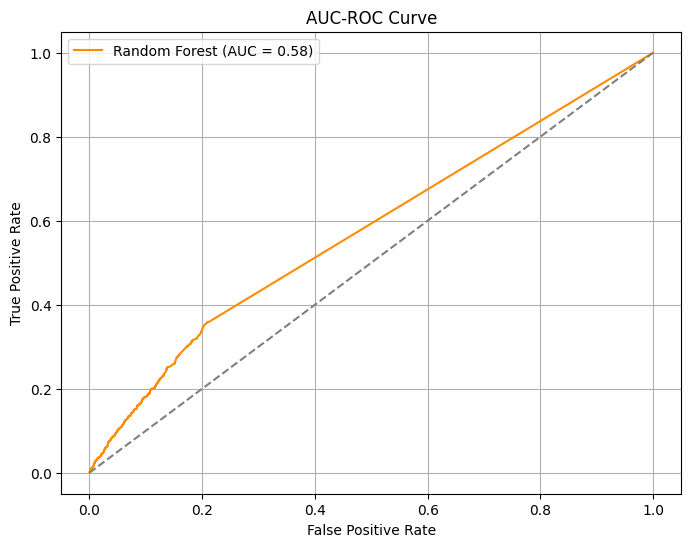

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.3, random_state=42)
rf_model.fit(X_train, y_train)
y_probs = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

From the above analysis, it can be seen that average cross validation accuracy was 97.60% but the ROC-AUC curve score is verly low i.e. 57.56% indicating the class imbalance in the dataset. From EDA, we had seen that the click rate of links was very low in percemtage and opening rate was higher.

In [27]:
df_email_table['clicked'].value_counts(normalize=True)

clicked
0    0.97881
1    0.02119
Name: proportion, dtype: float64

As we can see that about 97.8% of the users didn't click the link and only 2.12% clicked the link in email.This indicates the class imbalance problem. Let's address this using over sampling techniques to handle the class imbalance problem.

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

# Split original data
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42, stratify=target)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote,y_train_smote)

# Predict probabilities
y_probs = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)

# Evaluate
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

ROC AUC Score: 0.5768755156487342

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95     19576
           1       0.04      0.15      0.07       424

    accuracy                           0.91     20000
   macro avg       0.51      0.54      0.51     20000
weighted avg       0.96      0.91      0.93     20000



Still after using SMOTE (Synthetic Minority Oversampling Technique), the ROC-AUC score is same as previous.This is because the difference in the number of samples of click the links is very small in number than the number of samples in opening emails.We need to use other models like XGBoost, lightGBM, Logistic Regression, Gradient Boosting and Adaptive Boosting models which can handle the class imbalance problem naturally.

In [29]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

# Split
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42, stratify=target)

# Calculate class imbalance ratio
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Model
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

# Train
xgb_clf.fit(X_train, y_train)

# Predict
y_probs = xgb_clf.predict_proba(X_test)[:, 1]
y_pred = xgb_clf.predict(X_test)

# Evaluate
print("XgBoost ROC AUC Score:", roc_auc_score(y_test, y_probs))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

XgBoost ROC AUC Score: 0.6953803897340602

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.72      0.83     19576
           1       0.04      0.53      0.07       424

    accuracy                           0.72     20000
   macro avg       0.51      0.62      0.45     20000
weighted avg       0.97      0.72      0.82     20000



In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train_smote, y_train_smote)
logreg_probs = logreg.predict_proba(X_test)[:, 1]
logreg_preds = logreg.predict(X_test)

print("Logistic Regression AUC:", roc_auc_score(y_test, logreg_probs))
print(classification_report(y_test, logreg_preds))

Logistic Regression AUC: 0.7004167598368429
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     19576
           1       0.08      0.24      0.12       424

    accuracy                           0.92     20000
   macro avg       0.53      0.59      0.54     20000
weighted avg       0.96      0.92      0.94     20000



In [31]:
!pip install lightgbm 

In [32]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(class_weight='balanced', random_state=42)
lgbm.fit(X_train, y_train)
lgbm_probs = lgbm.predict_proba(X_test)[:, 1]
lgbm_preds = lgbm.predict(X_test)

print("LightGBM AUC:", roc_auc_score(y_test, lgbm_probs))
print(classification_report(y_test, lgbm_preds))

[LightGBM] [Info] Number of positive: 1695, number of negative: 78305
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 78
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
LightGBM AUC: 0.7246702619110039
              precision    recall  f1-score   support

           0       0.99      0.67      0.80     19576
           1       0.04      0.65      0.08       424

    accuracy                           0.67     20000
   macro avg       0.51      0.66      0.44     20000
weighted avg       0.97      0.67      0.78     20000



In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier


# Initialize models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "ROC AUC Score": roc_auc,
        "Classification Report": report
    }

results

{'Logistic Regression': {'ROC AUC Score': 0.7004167598368429,
  'Classification Report': {'0': {'precision': 0.9826985912475227,
    'recall': 0.9371679607682877,
    'f1-score': 0.9593933847561773,
    'support': 19576.0},
   '1': {'precision': 0.07588279489105935,
    'recall': 0.23820754716981132,
    'f1-score': 0.1150997150997151,
    'support': 424.0},
   'accuracy': 0.92235,
   'macro avg': {'precision': 0.529290693069291,
    'recall': 0.5876877539690495,
    'f1-score': 0.5372465499279462,
    'support': 20000.0},
   'weighted avg': {'precision': 0.9634740963647657,
    'recall': 0.92235,
    'f1-score': 0.9414943589594602,
    'support': 20000.0}}},
 'Gradient Boosting': {'ROC AUC Score': 0.7212566793378106,
  'Classification Report': {'0': {'precision': 0.9847218045112782,
    'recall': 0.8362791172864732,
    'f1-score': 0.904450153310682,
    'support': 19576.0},
   '1': {'precision': 0.05037037037037037,
    'recall': 0.4009433962264151,
    'f1-score': 0.0894972361147670

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Initialize the model
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), 
                          activation='relu', 
                          solver='adam',
                          max_iter=200,
                          random_state=42)

# Train the model
mlp_model.fit(X_resampled, y_resampled)

# Predict
y_pred = mlp_model.predict(X_test)
y_pred_proba = mlp_model.predict_proba(X_test)[:,1]

# Evaluation
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.6692832024774271
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     19576
           1       0.04      0.18      0.07       424

    accuracy                           0.89     20000
   macro avg       0.51      0.54      0.50     20000
weighted avg       0.96      0.89      0.92     20000



C:\Users\rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [38]:
# Predict click probabilities
df_email_table['predicted_click_prob'] = logreg.predict_proba(features_encoded)[:,1]

# Sort by highest predicted click probability
top_emails = df_email_table.sort_values(by='predicted_click_prob', ascending=False)

# Simulate sending to top N% (say 30%) of users
top_30_percent = top_emails.head(int(0.3 * len(top_emails)))

# Estimated CTR for top 30%
estimated_ctr = top_30_percent['clicked'].mean()
original_ctr = df_email_table['clicked'].mean()

improvement = estimated_ctr - original_ctr

print(f"Original CTR: {original_ctr:.4f}")
print(f"Estimated CTR if sent to top 30%: {estimated_ctr:.4f}")
print(f"Estimated improvement: {improvement:.4f}")

Original CTR: 0.0212
Estimated CTR if sent to top 30%: 0.0411
Estimated improvement: 0.0199


Using the logistic regression model to predict the probability of users clicking on the email, we simulated a targeted campaign strategy where emails are only sent to the top 30% of users most likely to click.

<li>Original CTR (baseline): 2.12% </li>

<li>Estimated CTR if emails are sent to the top 30% most likely users: 4.11%</li>

<li>Estimated improvement in CTR: 1.99%</li>

This represents a relative improvement of nearly 94% over the original CTR.

<h2>A/B Testing to test the significance of logistic regression predictions</h2>

In [48]:
from statsmodels.stats.proportion import proportions_ztest
# Total number of users to send emails to (30%)
top_n = int(0.3 * len(df_email_table))

# A: Random 30% sample from the dataset
group_a = df_email_table.sample(n=top_n, random_state=42)

# B: Top 30% most likely to click (based on model)
group_b = df_email_table.sort_values(by='predicted_click_prob', ascending=False).head(top_n)

# ------------------ CTR Calculation ------------------

ctr_a = group_a['clicked'].mean()
ctr_b = group_b['clicked'].mean()

# ------------------ Z-test for proportion ------------------

# Number of clicks in each group
clicks = np.array([group_a['clicked'].sum(), group_b['clicked'].sum()])
# Number of emails sent in each group
n = np.array([len(group_a), len(group_b)])

# Perform z-test
stat, pval = proportions_ztest(clicks, n)

# ------------------ Output ------------------

print(f"Random Targeting CTR (Group A): {ctr_a:.4f}")
print(f"Model Targeting CTR (Group B): {ctr_b:.4f}")
print(f"Estimated Improvement: {ctr_b - ctr_a:.4f}")
print(f"Z-statistic: {stat:.4f}")
print(f"P-value: {pval:.4f}")

if pval < 0.05:
    print("The improvement is statistically significant!")
else:
    print("The improvement is not statistically significant.")

Random Targeting CTR (Group A): 0.0225
Model Targeting CTR (Group B): 0.0411
Estimated Improvement: 0.0186
Z-statistic: -12.9892
P-value: 0.0000
The improvement is statistically significant!


This answers the third question of case study <b>By how much do you think your model would improve click through rate (defined as # of users who click on the link/total users who receive the email). How would you test that?</b>

Using the logistic regression model to predict the probability of users clicking on the email, we simulated a targeted campaign strategy where emails are only sent to the top 30% of users most likely to click.

<li>Original CTR (baseline): 2.12% </li>

<li>Estimated CTR if emails are sent to the top 30% most likely users: 4.11%</li>

<li>Estimated improvement in CTR: 1.99%</li>

This represents a relative improvement of nearly 94% over the original CTR.

We would run an A/B test as follows:

<li>Group A (Control Group): Randomly select 30% of users from the population and send them the email.</li>

<li>Group B (Test Group): Select the top 30% of users based on model-predicted click probability and send them the email.</li>

Then, we would compare the CTR between the two groups to evaluate if the model-based targeting strategy significantly improves performance over random targeting.
Statistical tests like a two-proportion z-test could be used to assess the significance of the difference.

ROC AUC Score: 0.7004167598368429


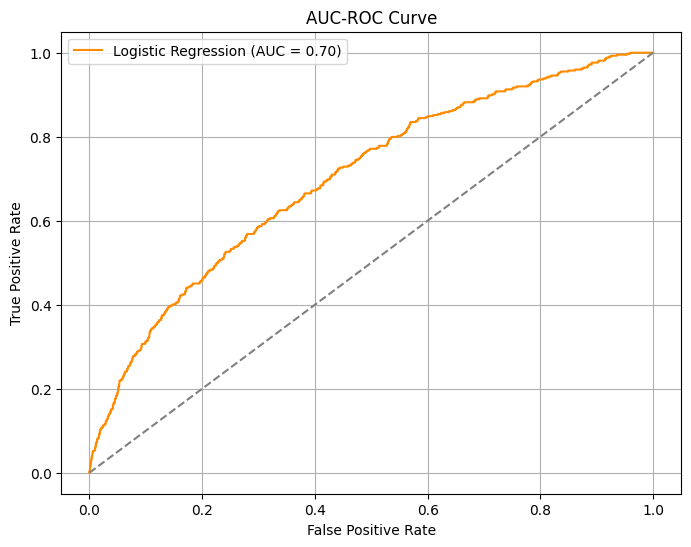

In [39]:
logreg.fit(X_train_smote, y_train_smote)

# Predict probabilities
y_probs = logreg.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

Based on the performance metrics of all the models, it is clear that the logistic regression model will be the perfect model as it has good ROC-AUC score of 70%.Reasonable recall and f1-score for class 1 without extreme drop in precision and it will also be easy to improve through thresholding.

This answers the second question of case study that <b>Can you build a model to optimize in future how to send emails to maximize the probability of users clicking on the link inside the email?</b>.

<h2>Now, we will see which features are contributing most in making predictions.</h2>

In [40]:
feature_names = features_encoded.columns  
coefficients = logreg.coef_[0]

# Combine and sort by absolute value
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values(by='Abs_Coefficient', ascending=False)

print(feature_importance)

                       Feature  Coefficient  Abs_Coefficient
14             user_country_FR    -9.534932         9.534932
13             user_country_ES    -8.962937         8.962937
6               weekday_Friday    -8.121442         8.121442
9               weekday_Sunday    -7.866504         7.866504
8             weekday_Saturday    -7.713306         7.713306
4        email_version_generic    -7.704092         7.704092
2        email_text_long_email    -7.537405         7.537405
7               weekday_Monday    -7.480813         7.480813
11             weekday_Tuesday    -7.158035         7.158035
10            weekday_Thursday    -7.153491         7.153491
3       email_text_short_email    -7.109324         7.109324
15             user_country_UK    -6.835204         6.835204
12           weekday_Wednesday    -6.824493         6.824493
5   email_version_personalized    -6.690455         6.690455
16             user_country_US    -6.183752         6.183752
1          user_past_pur

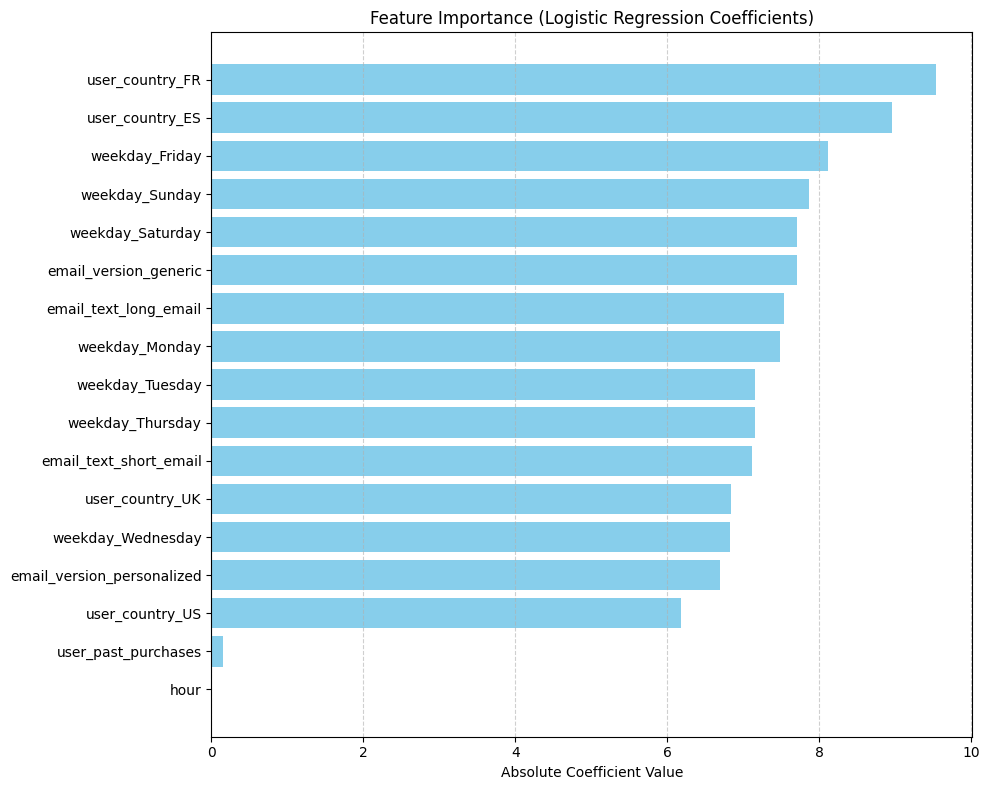

In [41]:
df = pd.DataFrame(feature_importance)
df_sorted = df.sort_values(by='Abs_Coefficient', ascending=True)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(df_sorted['Feature'], df_sorted['Abs_Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

This shows how influential each feature is in predicting the likelihood of a click (binary classification), based on the magnitude of logistic regression coefficients.

Features at the top (like user_country_FR, user_country_ES, weekday_Friday) have the most impact on the prediction.
This is because their coefficients (absolute value) are large, indicating strong influence on the output.

Feature	Interpretation
1.	user_country_FR:	Users from France are strongly correlated with clicking or not clicking.<br/>
2.	user_country_ES:	Same for users from Spain.<br/>
3.	weekday_Friday:	Emails sent on Friday have a big influence.<br/>
4.	weekday_Sunday:	Sunday email timing matters a lot.<br/>
5.	weekday_Saturday:	Saturday also plays a strong role.<br/>

<b>Least important features:</b>
hour, user_past_purchases have very low coefficients.
This suggests email sending hour and user past purchases have little influence on click behavior in this model.

In [42]:
import shap 
shap.initjs()

C:\Users\rishi\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:
explainer=shap.LinearExplainer(logreg,X_train_smote,feature_names=features_encoded.columns)
shap_values = explainer.shap_values(X_test)

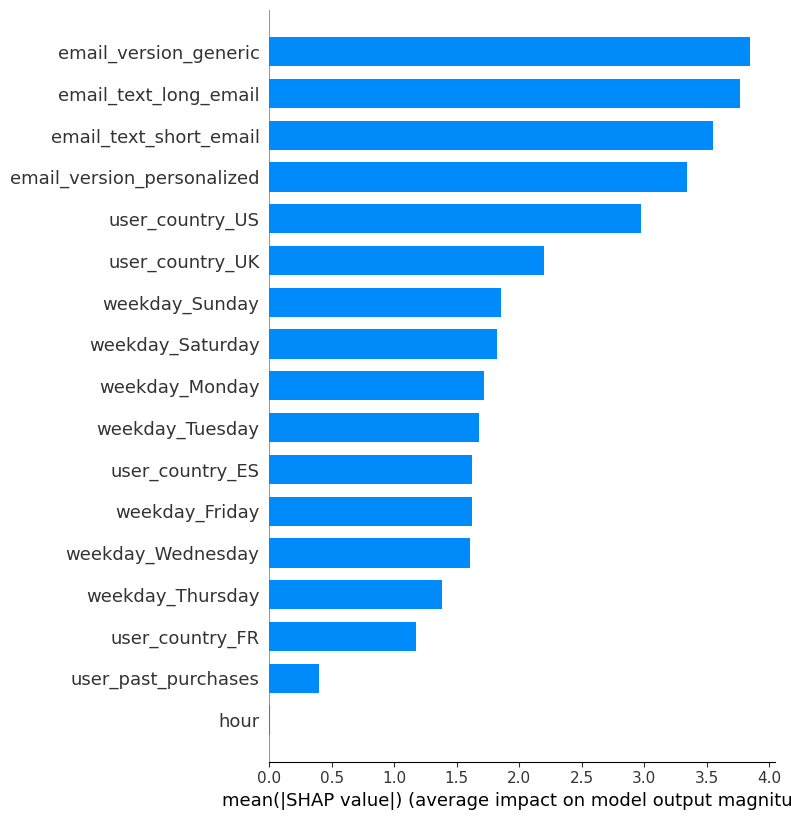

In [54]:
shap.summary_plot(shap_values, X_test, feature_names=features_encoded.columns, plot_type="bar")

<Figure size 1000x600 with 0 Axes>

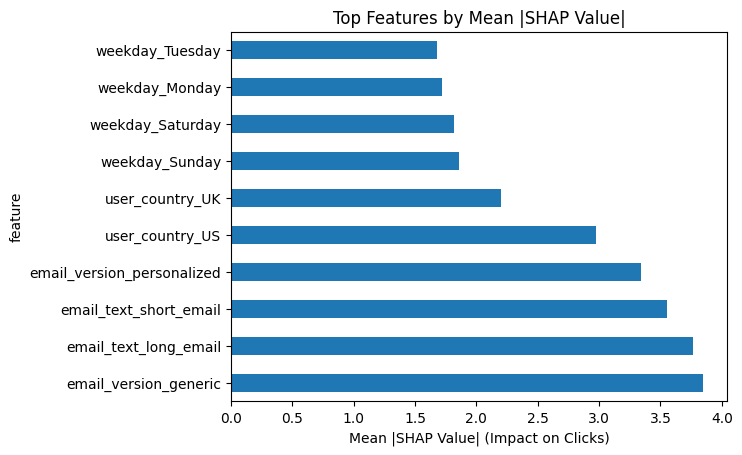

In [45]:
# Calculate mean SHAP values per category
mean_shap = pd.DataFrame({
    "feature": features_encoded.columns,
    "mean_shap": np.abs(shap_values).mean(axis=0)
})

# Plot top features (e.g., countries)
plt.figure(figsize=(10, 6))
mean_shap.sort_values("mean_shap", ascending=False).head(10).plot.barh(
    x="feature", y="mean_shap", legend=False
)
plt.title("Top Features by Mean |SHAP Value|")
plt.xlabel("Mean |SHAP Value| (Impact on Clicks)")
plt.show()

This bar chart shows mean absolute SHAP values for features used in a model predicting email click-throughs. SHAP (SHapley Additive exPlanations) helps explain how much each feature contributes, on average, to the model’s output.

The plot has derived top 5 most Influential features:-

1. email_version_generic <br/>
2. email_text_long_email <br/>
3. email_text_short_email <br/>
4. email_version_personalized <br/>
5. user_country_US <br/>

The feature importance plot based on logistic regression coefficients and SHAP analysis helps to answer the last question of case study <b>Did you find any interesting pattern on how the email campaign performed for different segments of users? Explain.</b>

1. <b>Email content (version and length) matters most</b> <br/>
email_version_generic and email_text_long_email are the most impactful features.
Suggests that generic versions and longer emails played a crucial role in influencing user clicks.
<br/>
2. <b>Country-specific performance differences</b> <br/>
user_country_US and user_country_UK are among the top influential user features.
This indicates that email engagement patterns vary by country.
Perhaps users in the US respond more positively or negatively than other regions.
<br/>
3. <b> Weekday impact is weaker</b> <br/>
weekday_Sunday, weekday_Saturday, weekday_Monday, etc., are less impactful.
Suggests that day of the week isn’t a strong standalone predictor of clicks.
However, it may still play a role in combination with other features (e.g., content type + day).

<h2>Final Conclusion</h2>
The SHAP analysis reveals that the content of the email campaign—particularly the version type and text length—has the strongest influence on user clicks, far more than the day of the week it is sent. Specifically, generic and long-form emails drive higher engagement, indicating that users respond better to informative and possibly standardized content.
Additionally, user segmentation by country (especially US and UK) significantly impacts click behavior, suggesting that localizing email strategies can further improve campaign performance.
In contrast, weekday-based targeting shows minimal influence, implying that send-day alone does not meaningfully affect user engagement.